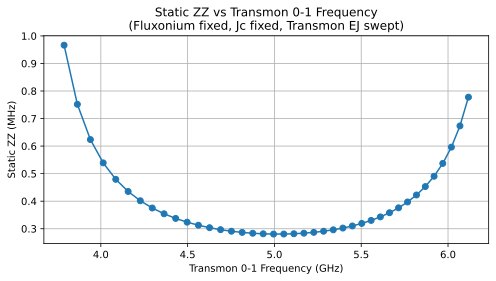

In [40]:
## Just a sample ZZ calculation plot varying transmon params

import scqubits as scq
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Fixed Fluxonium parameters
fluxonium_params = dict(
    EC=1,
    EJ=4.2,
    EL=0.9,
    flux=0.5,
    cutoff=110,
    truncated_dim=10,
)

# Fixed Transmon EC
transmon_EC = 0.2

# Coupling strength
Jc = 0.024

# Range of Transmon EJ to sweep
EJ_list = np.linspace(10, 25, 40)
freq_01_list = []
static_ZZ_list = []

for EJ in EJ_list:
    # Create qubits
    qbta = scq.Fluxonium(**fluxonium_params)
    qbtb = scq.Transmon(EJ=EJ, EC=transmon_EC, ng=0, ncut=110, truncated_dim=10)
    
    # Hilbert space and interaction
    hilbertspace = scq.HilbertSpace([qbta, qbtb])
    hilbertspace.add_interaction(
        g_strength=Jc,
        op1=qbta.n_operator,
        op2=qbtb.n_operator,
    )
    hilbertspace.generate_lookup()
    
    # Dressed Hamiltonian
    (evals,) = hilbertspace["evals"]
    diag_dressed_hamiltonian = (
        2 * np.pi * qt.Qobj(np.diag(evals), dims=[hilbertspace.subsystem_dims] * 2)
    )
    total_truncation = 50
    def truncate(operator: qt.Qobj, dimension: int) -> qt.Qobj:
        return qt.Qobj(operator[:dimension, :dimension])
    diag_dressed_hamiltonian_trunc = truncate(diag_dressed_hamiltonian, total_truncation)
    evalues = (diag_dressed_hamiltonian_trunc.eigenenergies() - diag_dressed_hamiltonian_trunc.eigenenergies()[0]) / 6.28

    # Get indices for relevant states
    def get_idx(state_tuple):
        return hilbertspace.dressed_index(state_tuple)
    e_11 = evalues[get_idx((1,1))]
    e_10 = evalues[get_idx((1,0))]
    e_01 = evalues[get_idx((0,1))]
    e_00 = evalues[get_idx((0,0))]
    
    # Static ZZ
    static_ZZ = e_11 - e_10 - e_01 + e_00
    static_ZZ_list.append(static_ZZ * 1e3)  # Convert to MHz

    # Transmon 0-1 frequency (bare)
    transmon_freq_01 = qbtb.eigenvals()[1] - qbtb.eigenvals()[0]
    freq_01_list.append(transmon_freq_01)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(freq_01_list, static_ZZ_list, marker='o')
plt.xlabel('Transmon 0-1 Frequency (GHz)')
plt.ylabel('Static ZZ (MHz)')
plt.title('Static ZZ vs Transmon 0-1 Frequency\n(Fluxonium fixed, Jc fixed, Transmon EJ swept)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### So ZZ is expected to be positive

## Just a sample FT system 

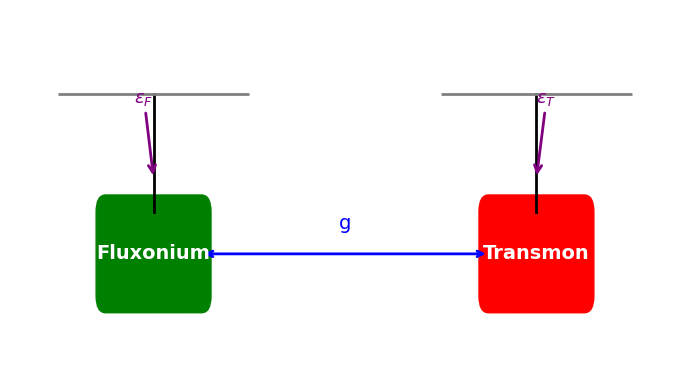

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(figsize=(7, 4))
 
# Draw Qubits as rectangles
qubit1 = mpatches.FancyBboxPatch((1, 2), 1, 0.5, boxstyle="round,pad=0.1", color='green')
qubit2 = mpatches.FancyBboxPatch((5, 2), 1, 0.5, boxstyle="round,pad=0.1", color='red')
ax.add_patch(qubit1)
ax.add_patch(qubit2)

# Draw coupling between qubits
ax.annotate('', xy=(2, 2.25), xytext=(5, 2.25),
            arrowprops=dict(arrowstyle='<->', lw=2, color='blue'))
ax.text(3.5, 2.4, 'g', color='blue', fontsize=14, ha='center')

# Draw charge lines
ax.plot([1.5, 1.5], [3.2, 2.5], color='black', lw=2)
ax.plot([5.5, 5.5], [3.2, 2.5], color='black', lw=2)
ax.hlines(3.2, 0.5, 2.5, color='gray', lw=2)
ax.hlines(3.2, 4.5, 6.5, color='gray', lw=2)

# Draw coupling from charge lines to qubits (epsilons)
ax.annotate(r'$\epsilon_{F}$', xy=(1.5, 2.7), xytext=(1.5, 3.15),
            arrowprops=dict(arrowstyle='->', lw=2, color='purple'), color='purple', fontsize=13, ha='right')
ax.annotate(r'$\epsilon_{T}$', xy=(5.5, 2.7), xytext=(5.5, 3.15),
            arrowprops=dict(arrowstyle='->', lw=2, color='purple'), color='purple', fontsize=13, ha='left')

# Label Qubits
ax.text(1.5, 1.9, 'Fluxonium', ha='center', fontsize=12, color='green')
ax.text(5.5, 1.9, 'Transmon', ha='center', fontsize=12, color='red')

# Add labels inside the qubit boxes on the existing ax
ax.text(1.5, 2.25, 'Fluxonium', ha='center', va='center', fontsize=14, color='white', fontweight='bold')
ax.text(5.5, 2.25, 'Transmon', ha='center', va='center', fontsize=14, color='white', fontweight='bold')
fig.canvas.draw()

ax.set_xlim(0, 7)
ax.set_ylim(1.5, 3.7)
ax.axis('off')
plt.tight_layout()
plt.show()

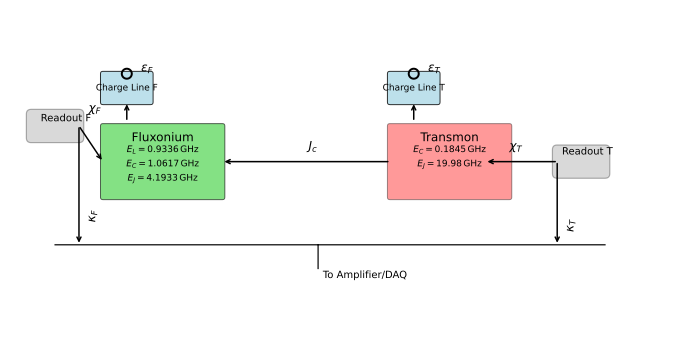

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 14)
ax.set_ylim(0, 7)
ax.axis('off')

# Common Y level
device_y = 3

# Draw Fluxonium block
fluxonium_rect = patches.FancyBboxPatch(
    (2, device_y), 2.5, 1.5, boxstyle="round,pad=0.05",
    linewidth=1, edgecolor='black', facecolor='limegreen', alpha=0.6)
ax.add_patch(fluxonium_rect)
ax.text(3.25, device_y + 1.25, 'Fluxonium', ha='center', va='center', fontsize=12)
ax.text(3.25, device_y + 0.95, r'$E_L = 0.9336\,$GHz', ha='center', fontsize=9)
ax.text(3.25, device_y + 0.65, r'$E_C = 1.0617\,$GHz', ha='center', fontsize=9)
ax.text(3.25, device_y + 0.35, r'$E_J = 4.1933\,$GHz', ha='center', fontsize=9)

# Draw Transmon block
transmon_rect = patches.FancyBboxPatch(
    (8, device_y), 2.5, 1.5, boxstyle="round,pad=0.05",
    linewidth=1, edgecolor='black', facecolor='red', alpha=0.4)
ax.add_patch(transmon_rect)
ax.text(9.25, device_y + 1.25, 'Transmon', ha='center', va='center', fontsize=12)
ax.text(9.25, device_y + 0.95, r'$E_C = 0.1845\,$GHz', ha='center', fontsize=9)
ax.text(9.25, device_y + 0.65, r'$E_J = 19.98\,$GHz', ha='center', fontsize=9)

# Coupling
ax.annotate('', xy=(4.5, device_y + 0.75), xytext=(8, device_y + 0.75),
            arrowprops=dict(arrowstyle='->', lw=1.5))
ax.text(6.3, device_y + 1, r'$J_c$', fontsize=12)

# Charge line boxes and drive lines
charge_flux_box = patches.FancyBboxPatch(
    (2.0, 5.0), 1, 0.6, boxstyle="round,pad=0.05",
    linewidth=1, edgecolor='black', facecolor='lightblue', alpha=0.8)
ax.add_patch(charge_flux_box)
ax.text(2.5, 5.3, 'Charge Line F', ha='center', va='center', fontsize=9)

charge_trans_box = patches.FancyBboxPatch(
    (8.0, 5.0), 1, 0.6, boxstyle="round,pad=0.05",
    linewidth=1, edgecolor='black', facecolor='lightblue', alpha=0.8)
ax.add_patch(charge_trans_box)
ax.text(8.5, 5.3, 'Charge Line T', ha='center', va='center', fontsize=9)

ax.annotate('', xy=(2.5, 5.0), xytext=(2.5, device_y + 1.6),
            arrowprops=dict(arrowstyle='->', lw=1.5))
ax.plot(2.5, 5.6, 'o', markersize=10, markeredgewidth=2, fillstyle='none', color='black')
ax.text(2.8, 5.65, r'$\epsilon_F$', fontsize=12)

ax.annotate('', xy=(8.5, 5.0), xytext=(8.5, device_y + 1.6),
            arrowprops=dict(arrowstyle='->', lw=1.5))
ax.plot(8.5, 5.6, 'o', markersize=10, markeredgewidth=2, fillstyle='none', color='black')
ax.text(8.8, 5.65, r'$\epsilon_T$', fontsize=12)

# Readout resonators
res_flux = patches.FancyBboxPatch(
    (0.5, device_y + 1.25), 1, 0.5, boxstyle="round,pad=0.1",
    linewidth=1.2, edgecolor='black', facecolor='gray', alpha=0.3)
ax.add_patch(res_flux)
ax.annotate('', xy=(2, device_y + 0.75), xytext=(1.5, device_y + 1.5),
            arrowprops=dict(arrowstyle='->', lw=1.5))
ax.text(0.7, device_y + 1.6, 'Readout F', fontsize=10)
ax.text(1.7, device_y + 1.8, r'$\chi_F$', fontsize=12)

res_trans = patches.FancyBboxPatch(
    (11.5, device_y + 0.5), 1, 0.5, boxstyle="round,pad=0.1",
    linewidth=1.2, edgecolor='black', facecolor='gray', alpha=0.3)
ax.add_patch(res_trans)
ax.annotate('', xy=(10, device_y + 0.75), xytext=(11.5, device_y + 0.75),
            arrowprops=dict(arrowstyle='->', lw=1.5))
ax.text(11.6, device_y + 0.9, 'Readout T', fontsize=10)
ax.text(10.5, device_y + 1.0, r'$\chi_T$', fontsize=12)

# Transmission bus line
ax.plot([1.0, 6.5], [2.0, 2.0], color='black', linewidth=1.2)
ax.plot([6.5, 12.5], [2.0, 2.0], color='black', linewidth=1.2)
ax.plot([6.5, 6.5], [2.0, 1.5], color='black', linewidth=1.2)
ax.text(6.6, 1.3, 'To Amplifier/DAQ', fontsize=10)

# Arrows from readouts to transmission bus
ax.annotate('', xy=(1.5, 2.0), xytext=(1.5, device_y + 1.5),
            arrowprops=dict(arrowstyle='->', lw=1.5))
ax.annotate('', xy=(11.5, 2.0), xytext=(11.5, device_y + 0.75),
            arrowprops=dict(arrowstyle='->', lw=1.5))

# kappa labels at midpoints of vertical arrows
ax.text(1.65, 2.6, r'$\kappa_F$', fontsize=12, rotation=90, va='center')
ax.text(11.65, 2.4, r'$\kappa_T$', fontsize=12, rotation=90, va='center')

plt.show()


In [3]:
import scqubits as scq
import qutip as qt
import numpy as np
from matplotlib import pyplot as plt


qbta = scq.Fluxonium(
    EC=1,
    EJ = 4.2,
    EL=.9,
    flux=0.5,  # flux frustration point
    cutoff=110,
    truncated_dim=10,
)


qbtb = scq.Transmon(
     EJ=20,
     EC=0.2,
     ng=0,
     ncut=110,
     truncated_dim=10)


# define the common Hilbert space
hilbertspace = scq.HilbertSpace([qbta, qbtb])


# add interaction between two qubits
hilbertspace.add_interaction(
    g_strength=0.024,
    op1=qbta.n_operator,
    op2=qbtb.n_operator,
)

# generate spectrum lookup table
hilbertspace.generate_lookup()

## Parameter Extraction and Static ZZ Calculation for Coupled Fluxonium-Transmon System

In [3]:
 #Hamiltonian in dressed eigenbasis
(evals,) = hilbertspace["evals"]
# The factor of 2pi converts the energy to GHz so that the time is in units of ns
diag_dressed_hamiltonian = (
        2 * np.pi * qt.Qobj(np.diag(evals),
        dims=[hilbertspace.subsystem_dims] * 2)
)

# The matrix representations can be truncated further for the simulation
total_truncation = 50

# truncate operators to desired dimension
def truncate(operator: qt.Qobj, dimension: int) -> qt.Qobj:
    return qt.Qobj(operator[:dimension, :dimension])

diag_dressed_hamiltonian_trunc = truncate(diag_dressed_hamiltonian, total_truncation)

evalues = (diag_dressed_hamiltonian_trunc.eigenenergies()-diag_dressed_hamiltonian_trunc.eigenenergies()[0])/6.28


# get the representation of the n_a operator in the dressed eigenbasis of the composite system
n_a = hilbertspace.op_in_dressed_eigenbasis(op_callable_or_tuple=qbta.n_operator)
n_b = hilbertspace.op_in_dressed_eigenbasis(op_callable_or_tuple=qbtb.n_operator)
# truncate the operator after expressing in the dressed basis to speed up the simulation
n_a = truncate(n_a, total_truncation)
n_b = truncate(n_b, total_truncation)

# # convert the product states to the closes eigenstates of the dressed system
product_states_unsorted = [(0, 0), (1, 0), (0, 1),(2,0), (1, 1),(0,3) , (2,1),(0,2),(3,0),(1,2)]#,(4,0),(1,2),(3,1),(2,2),(5,0),(4,1),(3,2),(0,4),(1,4),(2,3),(1,3)]

idxs_unsorted = [hilbertspace.dressed_index((s1, s2)) for (s1, s2) in product_states_unsorted]

paired_data = list(zip(idxs_unsorted, product_states_unsorted))
sorted_data = sorted(paired_data, key=lambda x: x[0])
product_states = [data[1] for data in sorted_data]
idxs = [data[0] for data in sorted_data]
#sort after writing, paired data sort
for idx, state in zip(idxs, product_states):
    print(f"{idx} -> {state}")
    
    
states = [qt.basis(total_truncation, idx) for idx in idxs]

bare_states_a = qbta.eigenvals()-qbta.eigenvals()[0]
bare_states_b = qbtb.eigenvals()-qbtb.eigenvals()[0]

index_to_state = {idx: f'{state[0]}{state[1]}' for idx, state in zip(idxs, product_states)}


e_11 = evalues[hilbertspace.dressed_index((1,1))]
e_10 = evalues[hilbertspace.dressed_index((1,0))]
e_01 = evalues[hilbertspace.dressed_index((0,1))]
e_00 = evalues[hilbertspace.dressed_index((0,0))]
e_20 = evalues[hilbertspace.dressed_index((2,0))]
e_30 = evalues[hilbertspace.dressed_index((3,0))]
e_02 = evalues[hilbertspace.dressed_index((0,2))]


Static_ZZ = e_11-e_10-e_01+e_00


print('Static_ZZ(MHz)=',Static_ZZ, 'bare_F_01 = ',bare_states_a[1],'bare_F_12 =',bare_states_a[2]-bare_states_a[1], \
      'bare_T_01=',bare_states_b[1],'bare_F_03=',bare_states_a[3],'bare_T_12 =',bare_states_b[2]-bare_states_b[1])


0 -> (0, 0)
1 -> (1, 0)
2 -> (2, 0)
3 -> (0, 1)
4 -> (1, 1)
5 -> (3, 0)
6 -> (2, 1)
8 -> (0, 2)
9 -> (1, 2)
14 -> (0, 3)
Static_ZZ(MHz)= 0.00031008232668128244 bare_F_01 =  0.4480200217532273 bare_F_12 = 3.552291815882981 bare_T_01= 5.449027107429346 bare_F_03= 6.39402824178896 bare_T_12 = 5.229928256523674


In [4]:
# I have to fit the data of some measurements to get the parameters

Transmon_frequency_01 = 5.24 #GHz
Transmon_frequency_12 = 5.038 #GHz
Fluxonium_frequency_01 = 0.528 #GHz
Fluxonium_frequency_12 = 3.62 #GHz



In [8]:
from scipy.optimize import minimize

# Target frequencies from measurement (in GHz)
target_fluxonium_01 = 0.528
target_fluxonium_12 = 3.62
target_transmon_01 = 5.24
target_transmon_12 = 5.038


def freq_error(params):
    # params: [F_EJ, F_EC, F_EL, T_EJ, T_EC]
    F_EJ, F_EC, F_EL, T_EJ, T_EC = params

    # Create Fluxonium and Transmon objects with these parameters
    qbta_tmp = scq.Fluxonium(
        EC=F_EC, EJ=F_EJ, EL=F_EL, flux=0.5, cutoff=110, truncated_dim=10
    )
    qbtb_tmp = scq.Transmon(
        EJ=T_EJ, EC=T_EC, ng=0, ncut=110, truncated_dim=10
    )

    # Calculate eigenvalues (GHz)
    fluxonium_evals = qbta_tmp.eigenvals()
    transmon_evals = qbtb_tmp.eigenvals()

    # Calculate transition frequencies
    fluxonium_01 = fluxonium_evals[1] - fluxonium_evals[0]
    fluxonium_12 = fluxonium_evals[2] - fluxonium_evals[1]
    transmon_01 = transmon_evals[1] - transmon_evals[0]
    transmon_12 = transmon_evals[2] - transmon_evals[1]

    # Compute squared error
    err = (
        (fluxonium_01 - target_fluxonium_01) ** 2 +
        (fluxonium_12 - target_fluxonium_12) ** 2 +
        (transmon_01 - target_transmon_01) ** 2 +
        (transmon_12 - target_transmon_12) ** 2
    )
    return err


In [10]:
# Initial guesses: [F_EJ, F_EC, F_EL, T_EJ, T_EC]
x0 = [4.2, 1.0, 0.9, 20.0, 0.2]
bounds = [(0.1, 20), (0.05, 5), (0.05, 5), (5, 50), (0.05, 1)]

result = minimize(freq_error, x0, bounds=bounds, method='L-BFGS-B')

if result.success:
    F_EJ, F_EC, F_EL, T_EJ, T_EC = result.x
    print(f"Optimized Fluxonium: EJ={F_EJ:.4f}, EC={F_EC:.4f}, EL={F_EL:.4f}")
    print(f"Optimized Transmon: EJ={T_EJ:.4f}, EC={T_EC:.4f}")
else:
    print("Optimization failed:", result.message)

Optimized Fluxonium: EJ=4.1933, EC=1.0617, EL=0.9336
Optimized Transmon: EJ=19.9800, EC=0.1845


In [11]:
# Calculate the four transition frequencies using the optimized parameters
qbta_opt = scq.Fluxonium(
    EC=F_EC, EJ=F_EJ, EL=F_EL, flux=0.5, cutoff=110, truncated_dim=10
)
qbtb_opt = scq.Transmon(
    EJ=T_EJ, EC=T_EC, ng=0, ncut=110, truncated_dim=10
)

fluxonium_evals = qbta_opt.eigenvals()
transmon_evals = qbtb_opt.eigenvals()

fluxonium_01 = fluxonium_evals[1] - fluxonium_evals[0]
fluxonium_12 = fluxonium_evals[2] - fluxonium_evals[1]
transmon_01 = transmon_evals[1] - transmon_evals[0]
transmon_12 = transmon_evals[2] - transmon_evals[1]

# Print the calculated and target frequencies with error bars
print(f"Fluxonium 0-1: {fluxonium_01:.6f} GHz (target: {target_fluxonium_01:.6f}), error: {abs(fluxonium_01-target_fluxonium_01):.6e}")
print(f"Fluxonium 1-2: {fluxonium_12:.6f} GHz (target: {target_fluxonium_12:.6f}), error: {abs(fluxonium_12-target_fluxonium_12):.6e}")
print(f"Transmon 0-1: {transmon_01:.6f} GHz (target: {target_transmon_01:.6f}), error: {abs(transmon_01-target_transmon_01):.6e}")
print(f"Transmon 1-2: {transmon_12:.6f} GHz (target: {target_transmon_12:.6f}), error: {abs(transmon_12-target_transmon_12):.6e}")

# Print the total squared error
total_error = (
    (fluxonium_01 - target_fluxonium_01) ** 2 +
    (fluxonium_12 - target_fluxonium_12) ** 2 +
    (transmon_01 - target_transmon_01) ** 2 +
    (transmon_12 - target_transmon_12) ** 2
)
print(f"Total squared error: {total_error:.6e}")

Fluxonium 0-1: 0.528000 GHz (target: 0.528000), error: 4.397553e-07
Fluxonium 1-2: 3.620000 GHz (target: 3.620000), error: 4.432464e-07
Transmon 0-1: 5.239684 GHz (target: 5.240000), error: 3.156565e-04
Transmon 1-2: 5.038344 GHz (target: 5.038000), error: 3.444102e-04
Total squared error: 2.182578e-07


### Now with the optimized values focus on the 1-2 level ZZ and differential AC stark shift

In [102]:
import scqubits as scq
import qutip as qt
import numpy as np
from matplotlib import pyplot as plt


qbta = scq.Fluxonium(
    EC=1.0617,
    EJ = 4.1933,
    EL=.9336,
    flux=0.5,  # flux frustration point
    cutoff=110,
    truncated_dim=20,
)


qbtb = scq.Transmon(
     EJ=19.98,
     EC=0.1845,
     ng=0,
     ncut=110,
     truncated_dim=20)


# define the common Hilbert space
hilbertspace = scq.HilbertSpace([qbta, qbtb])


# add interaction between two qubits
hilbertspace.add_interaction(
    g_strength=0.0222,
    op1=qbta.n_operator,
    op2=qbtb.n_operator,
)

# generate spectrum lookup table
hilbertspace.generate_lookup()

In [103]:
 #Hamiltonian in dressed eigenbasis
(evals,) = hilbertspace["evals"]
# The factor of 2pi converts the energy to GHz so that the time is in units of ns
diag_dressed_hamiltonian = (
        2 * np.pi * qt.Qobj(np.diag(evals),
        dims=[hilbertspace.subsystem_dims] * 2)
)

# The matrix representations can be truncated further for the simulation
total_truncation = 50

# truncate operators to desired dimension
def truncate(operator: qt.Qobj, dimension: int) -> qt.Qobj:
    return qt.Qobj(operator[:dimension, :dimension])

diag_dressed_hamiltonian_trunc = truncate(diag_dressed_hamiltonian, total_truncation)

evalues = (diag_dressed_hamiltonian_trunc.eigenenergies()-diag_dressed_hamiltonian_trunc.eigenenergies()[0])/6.28


# get the representation of the n_a operator in the dressed eigenbasis of the composite system
n_a = hilbertspace.op_in_dressed_eigenbasis(op_callable_or_tuple=qbta.n_operator)
n_b = hilbertspace.op_in_dressed_eigenbasis(op_callable_or_tuple=qbtb.n_operator)
# truncate the operator after expressing in the dressed basis to speed up the simulation
n_a = truncate(n_a, total_truncation)
n_b = truncate(n_b, total_truncation)

# # convert the product states to the closes eigenstates of the dressed system
product_states_unsorted = [(0, 0), (1, 0), (0, 1),(2,0), (1, 1),(0,3) , (2,1),(0,2),(3,0),(1,2),(1,3),(3,1), (2,2)]#,(4,0),(1,2),(3,1),(2,2),(5,0),(4,1),(3,2),(0,4),(1,4),(2,3),(1,3)]

idxs_unsorted = [hilbertspace.dressed_index((s1, s2)) for (s1, s2) in product_states_unsorted]

paired_data = list(zip(idxs_unsorted, product_states_unsorted))
sorted_data = sorted(paired_data, key=lambda x: x[0])
product_states = [data[1] for data in sorted_data]
idxs = [data[0] for data in sorted_data]
#sort after writing, paired data sort
for idx, state in zip(idxs, product_states):
    print(f"{idx} -> {state}")
    
    
states = [qt.basis(total_truncation, idx) for idx in idxs]

bare_states_a = qbta.eigenvals()-qbta.eigenvals()[0]
bare_states_b = qbtb.eigenvals()-qbtb.eigenvals()[0]

index_to_state = {idx: f'{state[0]}{state[1]}' for idx, state in zip(idxs, product_states)}


e_11 = evalues[hilbertspace.dressed_index((1,1))]
e_10 = evalues[hilbertspace.dressed_index((1,0))]
e_01 = evalues[hilbertspace.dressed_index((0,1))]
e_00 = evalues[hilbertspace.dressed_index((0,0))]
e_20 = evalues[hilbertspace.dressed_index((2,0))]
e_30 = evalues[hilbertspace.dressed_index((3,0))]
e_02 = evalues[hilbertspace.dressed_index((0,2))]
e_12 = evalues[hilbertspace.dressed_index((1,2))]
e_21 = evalues[hilbertspace.dressed_index((2,1))]
e_03 = evalues[hilbertspace.dressed_index((0,3))]
e_13 = evalues[hilbertspace.dressed_index((1,3))]
e_22 = evalues[hilbertspace.dressed_index((2,2))]
e_31 = evalues[hilbertspace.dressed_index((3,1))]


Static_ZZ = (e_11-e_10-e_01+e_00)*1e3 #MHz
Delta_1  = ((e_21-e_11)- (e_20-e_10))*1e3 #MHz
Delta_2 = ((e_12-e_11)-(e_02-e_01))*1e3 #MHz

print(
    'Static_ZZ(MHz)=', f"{Static_ZZ:.4f}",
    'bare_F_01 =', f"{bare_states_a[1]:.4f}",
    'bare_F_12 =', f"{(bare_states_a[2]-bare_states_a[1]):.4f}",
    'bare_T_01=', f"{bare_states_b[1]:.4f}",
    'bare_F_03=', f"{bare_states_a[3]:.4f}",
    'bare_T_12 =', f"{(bare_states_b[2]-bare_states_b[1]):.4f}",
    'Delta_1 =', f"{Delta_1:.4f}",
    'Delta_2 =', f"{Delta_2:.4f}"
)


0 -> (0, 0)
1 -> (1, 0)
2 -> (2, 0)
3 -> (0, 1)
4 -> (1, 1)
5 -> (3, 0)
6 -> (2, 1)
8 -> (0, 2)
9 -> (1, 2)
10 -> (3, 1)
12 -> (2, 2)
13 -> (0, 3)
15 -> (1, 3)
Static_ZZ(MHz)= 0.2327 bare_F_01 = 0.5280 bare_F_12 = 3.6200 bare_T_01= 5.2391 bare_F_03= 6.7346 bare_T_12 = 5.0378 Delta_1 = -0.2462 Delta_2 = 0.2416


#### Measured 0->1 ZZ = ~232 KHz. So with Jc = 0.222 MHz it is a good set of approximation

#### Plot the energy level diagram (Static)

In [104]:
def plot_energy_levels(fluxonium_levels, transmon_levels, label_offset=0.08):
    fig, ax = plt.subplots(figsize=(4, 7))

    # Plot Fluxonium levels (left)
    for i, e in enumerate(fluxonium_levels):
        ax.hlines(e, 0.7, 1.1, color='green', linewidth=2)
        ax.text(0.65, e, f"|{i}0⟩", color='green', va='center', ha='right', fontsize=12)

    # Plot Transmon levels (right)
    for j, e in enumerate(transmon_levels):
        ax.hlines(e, 1.9, 2.3, color='red', linewidth=2)
        ax.text(2.35, e, f"|0{j}⟩", color='red', va='center', ha='left', fontsize=12)

    # Plot coupled states in the middle column
    ax.hlines(fluxonium_levels[0] + transmon_levels[0], 1.2, 1.8, color='black', linewidth=2)
    ax.text(1.5, fluxonium_levels[0] + transmon_levels[0] + label_offset, "|00⟩", color='black', va='bottom', ha='center', fontsize=12)
    ax.hlines(fluxonium_levels[1] + transmon_levels[1], 1.2, 1.8, color='black', linewidth=2)
    ax.text(1.5, fluxonium_levels[1] + transmon_levels[1] + label_offset, "|11⟩", color='black', va='bottom', ha='center', fontsize=12)
    ax.hlines(fluxonium_levels[2] + transmon_levels[1], 1.2, 1.8, color='black', linewidth=2)
    ax.text(1.5, fluxonium_levels[2] + transmon_levels[1] + label_offset, "|21⟩", color='black', va='bottom', ha='center', fontsize=12)
    ax.hlines(fluxonium_levels[1] + transmon_levels[2], 1.2, 1.8, color='black', linewidth=2)
    ax.text(1.5, fluxonium_levels[1] + transmon_levels[2] + label_offset, "|12⟩", color='black', va='bottom', ha='center', fontsize=12)
    ax.hlines(fluxonium_levels[2] + transmon_levels[2], 1.2, 1.8, color='black', linewidth=2)
    ax.text(1.5, fluxonium_levels[2] + transmon_levels[2] + label_offset, "|22⟩", color='black', va='bottom', ha='center', fontsize=12)
    ax.hlines(fluxonium_levels[3] + transmon_levels[1], 1.2, 1.8, color='black', linewidth=2)
    ax.text(1.5, fluxonium_levels[3] + transmon_levels[1] + label_offset, "|31⟩", color='black', va='bottom', ha='center', fontsize=12)

    # Draw transitions (arrows)
    def draw_arrow(x1, y1, x2, y2, label, color):
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', color=color, lw=2))
        ax.text((x1+x2)/2+0.05, (y1+y2)/2, label, color=color, fontsize=12, rotation=0, va='bottom')

    draw_arrow(1.5, fluxonium_levels[0] + transmon_levels[0], 2.1, transmon_levels[1], r'$\omega_{01-00}$', 'blue')
    draw_arrow(1.0, fluxonium_levels[1], 1.5, fluxonium_levels[1] + transmon_levels[1], r'$\omega_{11-10}$', 'blue')

    ax.set_xlim(0.5, 2.5)
    ax.set_ylim(-0.2, max(transmon_levels[-1], fluxonium_levels[-1]) + 1)
    ax.axis('off')
    ax.text(0.7, -0.7, "|Fluxonium⟩", color='green', fontsize=13, ha='left')
    ax.text(1.7, -0.7, "|Transmon⟩", color='red', fontsize=13, ha='left')

    plt.tight_layout()
    plt.show()


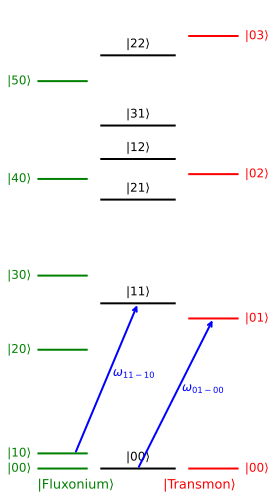

In [25]:
plot_energy_levels(bare_states_a[:6], bare_states_b[:4], label_offset=0.18)

### Now you have the Delta's i.e 1-2 level ZZ. We will use that for calculating ZZ cancellation scheme

In [105]:
# Calculate the required transition frequencies
omega_11_12 = e_12 - e_11
omega_01_02 = e_02 - e_01

omega_11_21 = e_21 - e_11
omega_10_20 = e_20 - e_10

omega_11_13 = e_13 - e_11
omega_01_03 = e_03 - e_01

omega_11_31 = e_31 - e_11
omega_10_30 = e_30 - e_10

Delta_1  = (omega_11_21- omega_10_20)*1e3 #MHz
Delta_2 = (omega_11_12-omega_01_02)*1e3 #MHz
Delta_3 = (omega_11_31-omega_10_30)*1e3 #MHz
Delta_4 = (omega_11_13-omega_01_03)*1e3 #MHz


print(f"omega_11_12 = {omega_11_12:.6f} GHz")
print(f"omega_01_02 = {omega_01_02:.6f} GHz")
print(f"omega_11_21 = {omega_11_21:.6f} GHz")
print(f"omega_10_20 = {omega_10_20:.6f} GHz")
print(f"omega_11_13 = {omega_11_13:.6f} GHz")
print(f"omega_01_03 = {omega_01_03:.6f} GHz")
print(f"omega_11_31 = {omega_11_31:.6f} GHz")
print(f"omega_10_30 = {omega_10_30:.6f} GHz")

print(f"Delta_1 = {Delta_1:.3f} MHz: shift of Fluxonium 1→2 by Transmon state.")
print(f"Delta_2 = {Delta_2:.3f} MHz: shift of Transmon 1→2 by Fluxonium state.")
print(f"Delta_3 = {Delta_3:.3f} MHz: shift of Fluxonium 1→3 by Transmon state.")
print(f"Delta_4 = {Delta_4:.3f} MHz: shift of Transmon 1→3 by Fluxonium state.")

omega_11_12 = 5.040539 GHz
omega_01_02 = 5.040298 GHz
omega_11_21 = 3.621429 GHz
omega_10_20 = 3.621675 GHz
omega_11_13 = 9.865610 GHz
omega_01_03 = 9.865087 GHz
omega_11_31 = 6.209788 GHz
omega_10_30 = 6.209670 GHz
Delta_1 = -0.246 MHz: shift of Fluxonium 1→2 by Transmon state.
Delta_2 = 0.242 MHz: shift of Transmon 1→2 by Fluxonium state.
Delta_3 = 0.118 MHz: shift of Fluxonium 1→3 by Transmon state.
Delta_4 = 0.523 MHz: shift of Transmon 1→3 by Fluxonium state.


### AC stark shift


The ac Stark shift (i.e. the qubit frequency change) is 
$\Delta\omega = \mathrm{sign}(\delta)\sqrt{\delta^2 + \Omega^2} - \delta$.
When the drive is red-detuned $\delta = \omega_q - \omega_d > 0$, $\Delta\omega > 0$ indicating the $|0\rangle$ state energy is pushed down and the $|1\rangle$ state energy is pushed up by $|\Delta\omega|/2$, i.e. the transition is 'distended'. When the drive is blue-detuned, the energy levels go to the opposite direction and the transition is 'squeezed'. We denote the dressed eigenstates by $|0'\rangle$ and $|1'\rangle$.

### Derivation: AC Stark Shift Approximation

The full AC Stark shift formula is:
$$
\Delta\omega = \mathrm{sign}(\delta)\sqrt{\delta^2 + \Omega^2} - \delta
$$
where  
- $\delta = \omega_q - \omega_d$ is the detuning,  
- $\Omega$ is the Rabi frequency (drive strength).

---

#### **Approximation for Large Detuning ($|\delta| \gg \Omega$)**

When the detuning is much larger than the drive ($|\delta| \gg \Omega$), expand the square root using a Taylor series:

$$
\sqrt{\delta^2 + \Omega^2} = |\delta| \sqrt{1 + \left(\frac{\Omega}{\delta}\right)^2}
$$

For $|\delta| \gg \Omega$, expand $\sqrt{1 + x}$ to first order:
$$
\sqrt{1 + x} \approx 1 + \frac{x}{2} \quad \text{for } |x| \ll 1
$$
where $x = \left(\frac{\Omega}{\delta}\right)^2$.

So,
$$
\sqrt{\delta^2 + \Omega^2} \approx |\delta| \left(1 + \frac{1}{2} \frac{\Omega^2}{\delta^2}\right) = |\delta| + \frac{\Omega^2}{2|\delta|}
$$

If $\delta > 0$, $\mathrm{sign}(\delta) = 1$, so:
$$
\Delta\omega \approx \left(|\delta| + \frac{\Omega^2}{2|\delta|}\right) - \delta = \frac{\Omega^2}{2\delta}
$$

---

#### **Final Approximate Formula**

$$
\boxed{
\Delta\omega \approx \frac{\Omega^2}{2\delta}
}
$$

This approximation is valid when $|\delta| \gg \Omega$.

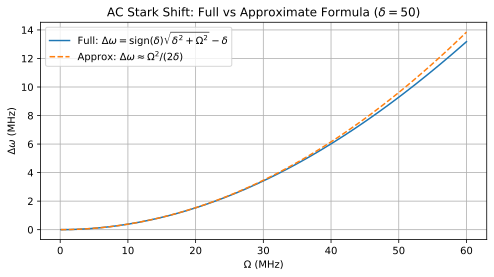

In [107]:
#Checking appriximation 

import numpy as np
import matplotlib.pyplot as plt

# Parameters
delta = 130  # detuning (can be positive or negative)
Omega_vals = np.linspace(0.1, 60, 500)

# Full formula
def delta_omega_full(Omega, delta):
    return np.sign(delta) * np.sqrt(delta**2 + Omega**2) - delta

# Approximate formula
def delta_omega_approx(Omega, delta):
    return Omega**2 / (2 * delta)

# Calculate
delta_omega_full_vals = delta_omega_full(Omega_vals, delta)
delta_omega_approx_vals = delta_omega_approx(Omega_vals, delta)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(Omega_vals, delta_omega_full_vals, label=r'Full: $\Delta\omega = \mathrm{sign}(\delta)\sqrt{\delta^2 + \Omega^2} - \delta$')
plt.plot(Omega_vals, delta_omega_approx_vals, '--', label=r'Approx: $\Delta\omega \approx \Omega^2/(2\delta)$')
plt.xlabel(r'$\Omega$ (MHz)')
plt.ylabel(r'$\Delta\omega$ (MHz)')
plt.title(r'AC Stark Shift: Full vs Approximate Formula ($\delta=50$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### As long as $\Omega / \delta < 3$ it is a good approximation

In [49]:
# work on this to calculate and map ZZ
def get_idx(state_tuple):
    state_string = f'{state_tuple[0]}{state_tuple[1]}'
    for idx, state_str in index_to_state.items():
        if state_str == state_string:
            return idx
    return None  # Return None if state_tuple is not found

def stark_effect(Omega, delta):
    return 0.5 * np.sqrt(Omega**2 + delta**2) - delta / 2

def compute_Omega(state_from, state_to, eps_1F=0, eps_2F=0, eps_1T=0, eps_2T=0):
    """
    Compute Omega for a transition between two states in the dressed basis.
    Only the specified epsilons are used; the others are set to zero.
    """
    idx_from = get_idx(state_from)
    idx_to = get_idx(state_to)
    # Only eps_1F and eps_2T are nonzero as per your request
    Omega = (
        abs(n_a[idx_from, idx_to]) * eps_1F +
        abs(n_b[idx_from, idx_to]) * eps_2T
    )
    return Omega


eps_F = 1
eps_T = 1
Delta = Delta_1
delta = 50


Omega_11_12 = compute_Omega((1, 1), (1, 2), eps_1F=eps_F, eps_2T=eps_T)
Omega_01_02 = compute_Omega((0, 1), (0, 2), eps_1F=eps_F, eps_2T=eps_T)

Omega_11_13 = compute_Omega((1, 1), (1, 3), eps_1F=eps_F, eps_2T=eps_T)
Omega_01_03 = compute_Omega((0, 1), (0, 3), eps_1F=eps_F, eps_2T=eps_T)

Omega_11_21 = compute_Omega((1, 1), (2, 1), eps_1F=eps_F, eps_2T=eps_T)
Omega_10_20 = compute_Omega((1, 0), (2, 0), eps_1F=eps_F, eps_2T=eps_T)

Omega_11_31 = compute_Omega((1, 1), (3, 1), eps_1F=eps_F, eps_2T=eps_T)
Omega_10_30 = compute_Omega((1, 0), (3, 0), eps_1F=eps_F, eps_2T=eps_T)

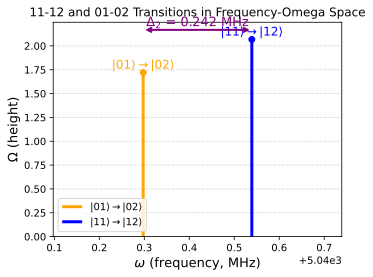

ValueError: could not broadcast input array from shape (2,) into shape (1,)

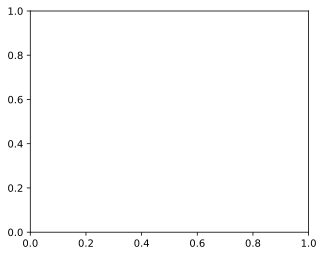

In [108]:
def plot_transition_comparison(x1, y1, x2, y2, label1, label2, delta_label, title):
    """
    Plots two vertical transitions and their frequency difference with an arrow.

    Parameters:
        x1, y1: float - x (frequency, MHz) and y (Omega) for first transition
        x2, y2: float - x (frequency, MHz) and y (Omega) for second transition
        label1: str - label for first transition
        label2: str - label for second transition
        delta_label: str - label for the frequency difference arrow
        title: str - plot title
    """
    x1 = x1 * 1e3  # Convert to MHz
    x2 = x2 * 1e3  # Convert to MHz
    
    fig, ax = plt.subplots(figsize=(5, 4))

    # Plot vertical lines for each transition
    ax.vlines(x1, 0, y1, color='orange', linestyle='-', linewidth=3, label=label1)
    ax.vlines(x2, 0, y2, color='blue', linestyle='-', linewidth=3, label=label2)

    # Mark the top of each line
    ax.plot(x1, y1, 'o', color='orange')
    ax.plot(x2, y2, 'o', color='blue')

    # Annotate transitions
    ax.text(x1, y1 + 0.01, label1, color='orange', ha='center', va='bottom', fontsize=12)
    ax.text(x2, y2 + 0.01, label2, color='blue', ha='center', va='bottom', fontsize=12)

    # Draw the Delta arrow between the two transitions
    mid_y = max(y1, y2) + 0.1
    ax.annotate(
        '',
        xy=(x2, mid_y),
        xytext=(x1, mid_y),
        arrowprops=dict(arrowstyle='<->', color='purple', lw=2)
    )
    # Annotate the Delta value
    delta_val = x2 - x1
    ax.text((x1 + x2) / 2, mid_y + 0.01, f'{delta_label} = {delta_val:.3f} MHz', color='purple', ha='center', va='bottom', fontsize=13)

    ax.set_xlabel(r'$\omega$ (frequency, MHz)', fontsize=13)
    ax.set_ylabel(r'$\Omega$ (height)', fontsize=13)
    ax.set_title(title)
    ax.set_xlim(min(x1, x2) - .2, max(x1, x2) + .2)
    ax.set_ylim(0, mid_y + 0.08)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


plot_transition_comparison(
    omega_01_02, Omega_01_02, omega_11_12, Omega_11_12,
    r'$|01\rangle \rightarrow |02\rangle$',
    r'$|11\rangle \rightarrow |12\rangle$',
    r'$\Delta_2$',
    '11-12 and 01-02 Transitions in Frequency-Omega Space'
)

plot_transition_comparison(
    omega_10_20, Omega_10_20, omega_11_21, Omega_11_21,
    r'$|10\rangle \rightarrow |20\rangle$',
    r'$|11\rangle \rightarrow |21\rangle$',
    r'$\Delta_1$',
    '10-20 and 11-21 Transitions in Frequency-Omega Space'
)

# plot_transition_comparison(
#     omega_10_30, Omega_10_30, omega_11_31, Omega_11_31,
#     r'$|10\rangle \rightarrow |30\rangle$',
#     r'$|11\rangle \rightarrow |31\rangle$',
#     r'$\Delta_3$',
#     '10-30 and 11-31 Transitions in Frequency-Omega Space'
# )

# plot_transition_comparison(
#     omega_01_03, Omega_01_03, omega_11_13, Omega_11_13,
#     r'$|01\rangle \rightarrow |03\rangle$',
#     r'$|11\rangle \rightarrow |13\rangle$',
#     r'$\Delta_4$',
#     '01-03 and 11-13 Transitions in Frequency-Omega Space'
# )


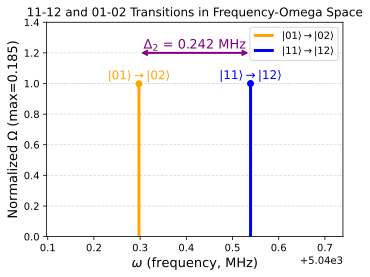

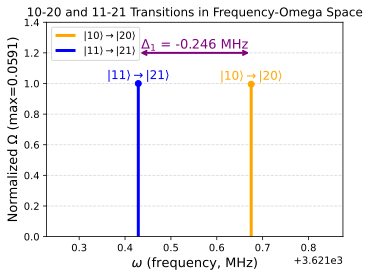

In [27]:
def plot_transition_comparison(x1, y1, x2, y2, label1, label2, delta_label, title):
    """
    Plots two vertical transitions and their frequency difference with an arrow.
    The y-axis (Omega) is normalized to the maximum of y1 and y2.
    """
    x1 = x1 * 1e3  # Convert to MHz
    x2 = x2 * 1e3  # Convert to MHz

    # Normalize y values
    max_y = max(abs(y1), abs(y2))
    y1_norm = y1 / max_y if max_y != 0 else 0
    y2_norm = y2 / max_y if max_y != 0 else 0

    fig, ax = plt.subplots(figsize=(5, 4))

    # Plot vertical lines for each transition
    ax.vlines(x1, 0, y1_norm, color='orange', linestyle='-', linewidth=3, label=label1)
    ax.vlines(x2, 0, y2_norm, color='blue', linestyle='-', linewidth=3, label=label2)

    # Mark the top of each line
    ax.plot(x1, y1_norm, 'o', color='orange')
    ax.plot(x2, y2_norm, 'o', color='blue')

    # Annotate transitions
    ax.text(x1, y1_norm + 0.01, label1, color='orange', ha='center', va='bottom', fontsize=12)
    ax.text(x2, y2_norm + 0.01, label2, color='blue', ha='center', va='bottom', fontsize=12)

    # Draw the Delta arrow between the two transitions
    mid_y = max(y1_norm, y2_norm) + 0.2
    ax.annotate(
        '',
        xy=(x2, mid_y),
        xytext=(x1, mid_y),
        arrowprops=dict(arrowstyle='<->', color='purple', lw=2)
    )
    # Annotate the Delta value
    delta_val = x2 - x1
    ax.text((x1 + x2) / 2, mid_y + 0.01, f'{delta_label} = {delta_val:.3f} MHz', color='purple', ha='center', va='bottom', fontsize=13)

    ax.set_xlabel(r'$\omega$ (frequency, MHz)', fontsize=13)
    ax.set_ylabel(r'Normalized $\Omega$ (max={:.3g})'.format(max_y), fontsize=13)
    ax.set_title(title)
    ax.set_xlim(min(x1, x2) - .2, max(x1, x2) + .2)
    ax.set_ylim(0, mid_y + 0.2)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_transition_comparison(
    omega_01_02, Omega_01_02, omega_11_12, Omega_11_12,
    r'$|01\rangle \rightarrow |02\rangle$',
    r'$|11\rangle \rightarrow |12\rangle$',
    r'$\Delta_2$',
    '11-12 and 01-02 Transitions in Frequency-Omega Space'
)

plot_transition_comparison(
    omega_10_20, Omega_10_20, omega_11_21, Omega_11_21,
    r'$|10\rangle \rightarrow |20\rangle$',
    r'$|11\rangle \rightarrow |21\rangle$',
    r'$\Delta_1$',
    '10-20 and 11-21 Transitions in Frequency-Omega Space'
)

# plot_transition_comparison(
#     omega_10_30, Omega_10_30, omega_11_31, Omega_11_31,
#     r'$|10\rangle \rightarrow |30\rangle$',
#     r'$|11\rangle \rightarrow |31\rangle$',
#     r'$\Delta_3$',
#     '10-30 and 11-31 Transitions in Frequency-Omega Space'
# )

# plot_transition_comparison(
#     omega_01_03, Omega_01_03, omega_11_13, Omega_11_13,
#     r'$|01\rangle \rightarrow |03\rangle$',
#     r'$|11\rangle \rightarrow |13\rangle$',
#     r'$\Delta_4$',
#     '01-03 and 11-13 Transitions in Frequency-Omega Space'
# )

#### Based on the above results seems $\Delta_2$ has the strongest matrix elements ; I can drive it with the smallest power. It is a positive ZZ effect. My 0-1 ZZ is also positive , so I need to push the |11> state down. And to achieve that I can extend 11-12 i.e red detuned i.e $\omega_d$ < $\omega_q$. $\Delta_2$ = $((e_{12}-e_{11})-(e_{02}-e_{01}))*1e3 = 0.242 $ #MHz  

### Differential AC stark shift 

Since $\omega_q > \omega_d$ so $\delta$ is positive i.e stark shift is positive

In [109]:
stark_effect(37,50.24,1)

TypeError: stark_effect() takes 2 positional arguments but 3 were given

### Checking matrix elements for Transmon 1-2

In [110]:


idx_from = get_idx((0, 1))
idx_to = get_idx((0, 2))
print(f"n_a_01_02 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_01_02 = {n_b[idx_from, idx_to]:.3f}")

idx_from = get_idx((1, 1))
idx_to = get_idx((1, 2))
print(f"n_a_11_12 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_11_12 = {n_b[idx_from, idx_to]:.3f}")


n_a_01_02 = 0.0042+0.0000j
n_b_01_02 = -1.847-0.001j
n_a_11_12 = -0.0010-0.0073j
n_b_11_12 = -0.255-1.829j


In [111]:


idx_from = get_idx((1, 0))
idx_to = get_idx((2, 0))
print(f"n_a_10_20 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_10_20 = {n_b[idx_from, idx_to]:.3f}")

idx_from = get_idx((1, 1))
idx_to = get_idx((2, 1))
print(f"n_a_11_21 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_11_21 = {n_b[idx_from, idx_to]:.3f}")


n_a_10_20 = 0.5348-0.2016j
n_b_10_20 = -0.015+0.006j
n_a_11_21 = -0.0000+0.5715j
n_b_11_21 = 0.000-0.019j


In [122]:


idx_from = get_idx((0, 0))
idx_to = get_idx((0, 1))
print(f"n_a_00_01 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_00_01 = {n_b[idx_from, idx_to]:.3f}")

idx_from = get_idx((1, 0))
idx_to = get_idx((1, 1))
print(f"n_a_10_11 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_10_11 = {n_b[idx_from, idx_to]:.3f}")


n_a_00_01 = 0.0034-0.0000j
n_b_00_01 = -1.332+0.001j
n_a_10_11 = -0.0042+0.0016j
n_b_10_11 = -1.246+0.470j


In [123]:


idx_from = get_idx((0, 0))
idx_to = get_idx((1, 0))
print(f"n_a_00_01 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_00_01 = {n_b[idx_from, idx_to]:.3f}")

idx_from = get_idx((0, 1))
idx_to = get_idx((1, 1))
print(f"n_a_10_11 = {n_a[idx_from, idx_to]:.4f}")
print(f"n_b_10_11 = {n_b[idx_from, idx_to]:.3f}")


n_a_00_01 = -0.1292-0.0487j
n_b_00_01 = 0.002+0.001j
n_a_10_11 = -0.1381-0.0001j
n_b_10_11 = 0.002+0.000j


### Calculating $\Omega$ for Two Drives with Phase Difference

Suppose the drive Hamiltonian is:
$$
H_\text{drive} = \epsilon_A n_A \cos(\omega_d t) + \epsilon_B n_B \cos(\omega_d t + \phi)
$$

For a transition between states $|i\rangle$ and $|f\rangle$, the Rabi frequency $\Omega_{i \to f}$ is given by:
$$
\Omega_{i \to f} = \left| \langle f | H_\text{drive} | i \rangle \right|
$$

Expanding the matrix elements:
$$
\langle f | H_\text{drive} | i \rangle = \epsilon_A \langle f | n_A | i \rangle \cos(\omega_d t) + \epsilon_B \langle f | n_B | i \rangle \cos(\omega_d t + \phi)
$$

Using Euler's formula, the relevant (resonant) part for the transition is:
$$
\Omega_{i \to f} = \left| \epsilon_A \langle f | n_A | i \rangle + \epsilon_B e^{i\phi} \langle f | n_B | i \rangle \right|
$$

**Steps:**
1. Obtain the matrix elements $\langle f | n_A | i \rangle$ and $\langle f | n_B | i \rangle$ (can be complex).
2. Choose amplitudes $\epsilon_A$, $\epsilon_B$ and phase difference $\phi$.
3. Compute $\Omega_{i \to f}$ as:
   $$
   \Omega_{i \to f} = \left| \epsilon_A \langle f | n_A | i \rangle + \epsilon_B e^{i\phi} \langle f | n_B | i \rangle \right|
   $$

#### Step-by-step derivation

1. **Start with the drive Hamiltonian:**
   $$
   H_\text{drive} = \epsilon_A n_A \cos(\omega_d t) + \epsilon_B n_B \cos(\omega_d t + \phi)
   $$

2. **Matrix element for the transition $|i\rangle \to |f\rangle$:**
   $$
   \langle f | H_\text{drive} | i \rangle = \epsilon_A \langle f | n_A | i \rangle \cos(\omega_d t) + \epsilon_B \langle f | n_B | i \rangle \cos(\omega_d t + \phi)
   $$

3. **Express cosines using Euler's formula:**
   $$
   \cos(\omega_d t) = \frac{e^{i\omega_d t} + e^{-i\omega_d t}}{2}
   $$
   $$
   \cos(\omega_d t + \phi) = \frac{e^{i(\omega_d t + \phi)} + e^{-i(\omega_d t + \phi)}}{2}
   $$

4. **Plug these into the matrix element:**
   $$
   \langle f | H_\text{drive} | i \rangle = \epsilon_A \langle f | n_A | i \rangle \frac{e^{i\omega_d t} + e^{-i\omega_d t}}{2}
   + \epsilon_B \langle f | n_B | i \rangle \frac{e^{i(\omega_d t + \phi)} + e^{-i(\omega_d t + \phi)}}{2}
   $$

5. **Group terms oscillating at $+\omega_d$ and $-\omega_d$:**
   $$
   = \frac{1}{2} \left[
     \epsilon_A \langle f | n_A | i \rangle e^{i\omega_d t}
     + \epsilon_B \langle f | n_B | i \rangle e^{i(\omega_d t + \phi)}
     + \epsilon_A \langle f | n_A | i \rangle e^{-i\omega_d t}
     + \epsilon_B \langle f | n_B | i \rangle e^{-i(\omega_d t + \phi)}
   \right]
   $$

6. **Focus on the resonant (rotating wave) terms:**
   - The terms $e^{i\omega_d t}$ drive the $|i\rangle \to |f\rangle$ transition.
   - The terms $e^{-i\omega_d t}$ are counter-rotating and can be neglected under the rotating wave approximation (RWA).

   So, keep only the $e^{i\omega_d t}$ terms:
   $$
   \langle f | H_\text{drive} | i \rangle \approx \frac{1}{2} \left[
     \epsilon_A \langle f | n_A | i \rangle e^{i\omega_d t}
     + \epsilon_B \langle f | n_B | i \rangle e^{i(\omega_d t + \phi)}
   \right]
   $$

7. **Factor out $e^{i\omega_d t}$:**
   $$
   = \frac{1}{2} e^{i\omega_d t} \left[
     \epsilon_A \langle f | n_A | i \rangle
     + \epsilon_B e^{i\phi} \langle f | n_B | i \rangle
   \right]
   $$

8. **The Rabi frequency $\Omega_{i \to f}$ is the modulus of the coefficient in front of $e^{i\omega_d t}$:**
   $$
   \Omega_{i \to f} = \left| \epsilon_A \langle f | n_A | i \rangle + \epsilon_B e^{i\phi} \langle f | n_B | i \rangle \right|
   $$

   (The factor of $1/2$ is often absorbed into the definition of $\epsilon$ or the Rabi frequency, depending on convention.)

---

**Summary:**  
- Write cosines as exponentials.
- Keep only the resonant terms ($e^{i\omega_d t}$).
- The Rabi frequency is the modulus of the sum of the two drive contributions, with the second term picking up a phase $e^{i\phi}$.

$$
\Omega_{i \to f} = \left|\, \epsilon_A \langle f | n_A | i \rangle + \epsilon_B e^{i\phi} \langle f | n_B | i \rangle \,\right|
$$

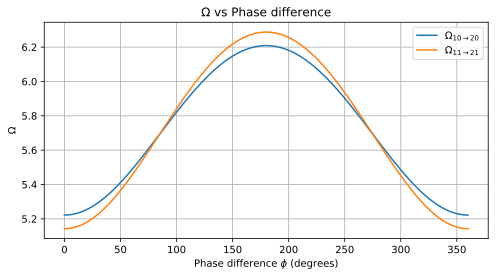

n_a_10_20 = 0.5348-0.2016j
n_b_10_20 = -0.0154+0.0058j
n_a_11_21 = -0.0000+0.5715j
n_b_11_21 = 0.0000-0.0191j


In [112]:
import numpy as np

def calc_Omega(nA, nB, eps_A, eps_B, phi_deg):
    """
    nA, nB: complex matrix elements <f|n_A|i>, <f|n_B|i>
    eps_A, eps_B: drive amplitudes (float)
    phi_deg: phase difference in degrees (float or array)
    Returns: Omega (float or array)
    """
    phi = np.deg2rad(phi_deg)
    Omega = np.abs(eps_A * nA + eps_B * np.exp(1j * phi) * nB)
    return Omega

# Calculate matrix elements using your get_idx and n_a, n_b
idx_from_10 = get_idx((1, 0))
idx_to_20 = get_idx((2, 0))
nA_10_20 = n_a[idx_from_10, idx_to_20]
nB_10_20 = n_b[idx_from_10, idx_to_20]

idx_from_11 = get_idx((1, 1))
idx_to_21 = get_idx((2, 1))
nA_11_21 = n_a[idx_from_11, idx_to_21]
nB_11_21 = n_b[idx_from_11, idx_to_21]

# Set drive amplitudes
eps_A = 10.0
eps_B = 30.0

# Sweep phase from 0 to 360 degrees
phi_deg_list = np.linspace(0, 360, 200)
Omega_10_20_list = []
Omega_11_21_list = []

for phi in phi_deg_list:
    Omega_10_20_list.append(calc_Omega(nA_10_20, nB_10_20, eps_A, eps_B, phi))
    Omega_11_21_list.append(calc_Omega(nA_11_21, nB_11_21, eps_A, eps_B, phi))

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.plot(phi_deg_list, Omega_10_20_list, label=r'$\Omega_{10\rightarrow20}$')
plt.plot(phi_deg_list, Omega_11_21_list, label=r'$\Omega_{11\rightarrow21}$')
plt.xlabel('Phase difference $\phi$ (degrees)')
plt.ylabel(r'$\Omega$')
plt.title(r'$\Omega$ vs Phase difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"n_a_10_20 = {nA_10_20:.4f}")
print(f"n_b_10_20 = {nB_10_20:.4f}")
print(f"n_a_11_21 = {nA_11_21:.4f}")
print(f"n_b_11_21 = {nB_11_21:.4f}")

n_a_01_02 = 0.0042+0.0000j
n_b_01_02 = -1.8470-0.0008j
n_a_11_12 = -0.0010-0.0073j
n_b_11_12 = -0.2551-1.8291j


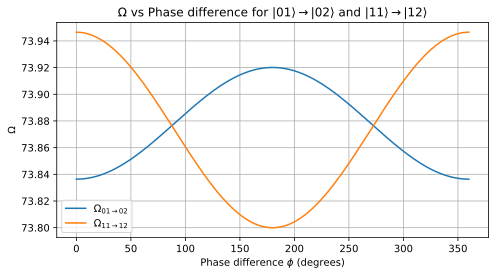

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def calc_Omega(nA, nB, eps_A, eps_B, phi_deg):
    """
    nA, nB: complex matrix elements <f|n_A|i>, <f|n_B|i>
    eps_A, eps_B: drive amplitudes (float)
    phi_deg: phase difference in degrees (float or array)
    Returns: Omega (float or array)
    """
    phi = np.deg2rad(phi_deg)
    Omega = np.abs(eps_A * nA + eps_B * np.exp(1j * phi) * nB)
    return Omega

# Calculate matrix elements for the transitions
idx_from_01 = get_idx((0, 1))
idx_to_02 = get_idx((0, 2))
nA_01_02 = n_a[idx_from_01, idx_to_02]
nB_01_02 = n_b[idx_from_01, idx_to_02]

idx_from_11 = get_idx((1, 1))
idx_to_12 = get_idx((1, 2))
nA_11_12 = n_a[idx_from_11, idx_to_12]
nB_11_12 = n_b[idx_from_11, idx_to_12]

print(f"n_a_01_02 = {nA_01_02:.4f}")
print(f"n_b_01_02 = {nB_01_02:.4f}")
print(f"n_a_11_12 = {nA_11_12:.4f}")
print(f"n_b_11_12 = {nB_11_12:.4f}")

# Set drive amplitudes
eps_A = 10.0
eps_B = 40.0

# Sweep phase from 0 to 360 degrees
phi_deg_list = np.linspace(0, 360, 200)
Omega_01_02_list = []
Omega_11_12_list = []

for phi in phi_deg_list:
    Omega_01_02_list.append(calc_Omega(nA_01_02, nB_01_02, eps_A, eps_B, phi))
    Omega_11_12_list.append(calc_Omega(nA_11_12, nB_11_12, eps_A, eps_B, phi))

plt.figure(figsize=(7, 4))
plt.plot(phi_deg_list, Omega_01_02_list, label=r'$\Omega_{01\rightarrow02}$')
plt.plot(phi_deg_list, Omega_11_12_list, label=r'$\Omega_{11\rightarrow12}$')
plt.xlabel('Phase difference $\phi$ (degrees)')
plt.ylabel(r'$\Omega$')
plt.title(r'$\Omega$ vs Phase difference for $|01\rangle\rightarrow|02\rangle$ and $|11\rangle\rightarrow|12\rangle$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Sweep $\epsilon_B$ and $\phi$ to Visualize $\Omega_{10\rightarrow20}$ and $\Omega_{11\rightarrow21}$

In [118]:
# Check and print the actual matrix elements from your current variables

idx_from_10 = get_idx((1, 0))
idx_to_20 = get_idx((2, 0))
nA_10_20_actual = n_a[idx_from_10, idx_to_20]
nB_10_20_actual = n_b[idx_from_10, idx_to_20]

idx_from_11 = get_idx((1, 1))
idx_to_21 = get_idx((2, 1))
nA_11_21_actual = n_a[idx_from_11, idx_to_21]
nB_11_21_actual = n_b[idx_from_11, idx_to_21]

print("From code variables:")
print(f"nA_10_20 = {nA_10_20_actual:.4f}")
print(f"nB_10_20 = {nB_10_20_actual:.4f}")
print(f"nA_11_21 = {nA_11_21_actual:.4f}")
print(f"nB_11_21 = {nB_11_21_actual:.4f}")

print("\nReference values you provided:")
print("nA_10_20 = 0.535 - 0.201j")
print("nB_10_20 = -0.15 + 0.006j")
print("nA_11_21 = 0.0000 + 0.5715j")
print("nB_11_21 = 0.0000 - 0.0190j")

From code variables:
nA_10_20 = 0.5348-0.2016j
nB_10_20 = -0.0154+0.0058j
nA_11_21 = -0.0000+0.5715j
nB_11_21 = 0.0000-0.0191j

Reference values you provided:
nA_10_20 = 0.535 - 0.201j
nB_10_20 = -0.15 + 0.006j
nA_11_21 = 0.0000 + 0.5715j
nB_11_21 = 0.0000 - 0.0190j


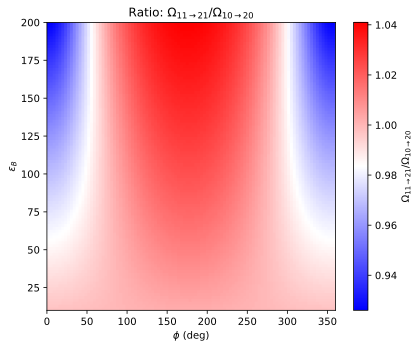

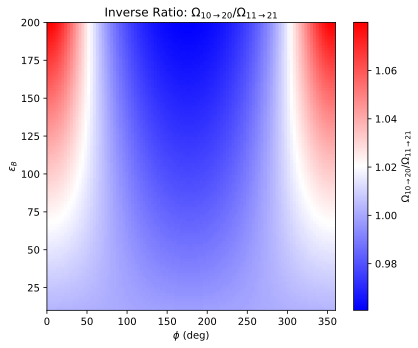

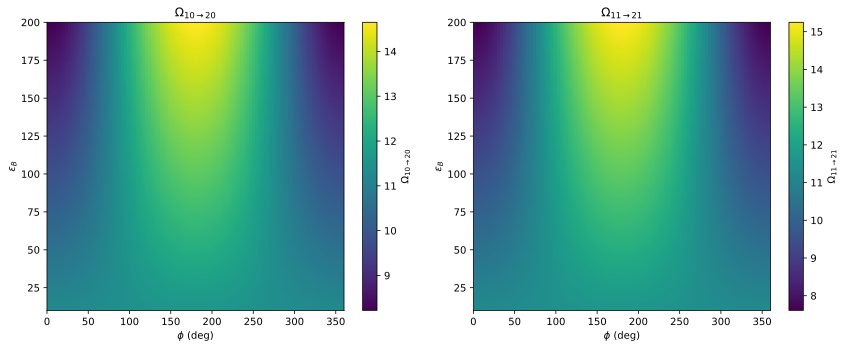

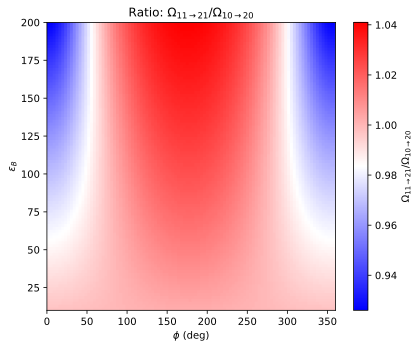

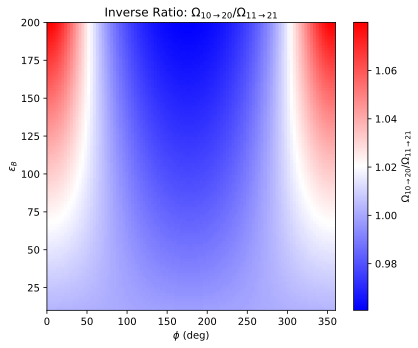

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def calc_Omega(nA, nB, eps_A, eps_B, phi_deg):
    phi = np.deg2rad(phi_deg)
    Omega = np.abs(eps_A * nA + eps_B * np.exp(1j * phi) * nB)
    return Omega

# Example values
# nA_10_20 = 0.535 - 0.201j
# nB_10_20 = -0.15 + 0.006j
# nA_11_21 = 0.5715j
# nB_11_21 = -0.019j

# # Calculate matrix elements using your get_idx and n_a, n_b
# idx_from_10 = get_idx((1, 0))
# idx_to_20 = get_idx((2, 0))
# nA_10_20 = n_a[idx_from_10, idx_to_20]
# nB_10_20 = n_b[idx_from_10, idx_to_20]

# idx_from_11 = get_idx((1, 1))
# idx_to_21 = get_idx((2, 1))
# nA_11_21 = n_a[idx_from_11, idx_to_21]
# nB_11_21 = n_b[idx_from_11, idx_to_21]

nA_10_20 = 0.535-0.2016j
nB_10_20 = -0.015+0.0058j
nA_11_21 = -0.0000+0.5715j
nB_11_21 = 0.0000-0.0191j

# Sweep parameters
eps_A = 20.0
eps_B_list = np.linspace(10, 200, 100)
phi_list = np.linspace(00, 360, 100)

Omega_10_20_grid = np.zeros((len(eps_B_list), len(phi_list)))
Omega_11_21_grid = np.zeros((len(eps_B_list), len(phi_list)))
Omega_ratio_grid = np.zeros((len(eps_B_list), len(phi_list)))

for i, eps_B in enumerate(eps_B_list):
    for j, phi in enumerate(phi_list):
        Omega_10_20 = calc_Omega(nA_10_20, nB_10_20, eps_A, eps_B, phi)
        Omega_11_21 = calc_Omega(nA_11_21, nB_11_21, eps_A, eps_B, phi)
        Omega_10_20_grid[i, j] = Omega_10_20
        Omega_11_21_grid[i, j] = Omega_11_21
        Omega_ratio_grid[i, j] = Omega_11_21 / (Omega_10_20 + 1e-12)  # avoid division by zero

# Plot the ratio Omega_11_21 / Omega_10_20
plt.figure(figsize=(6, 5))
plt.imshow(Omega_ratio_grid, aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='bwr')
plt.colorbar(label=r'$\Omega_{11\rightarrow21} / \Omega_{10\rightarrow20}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'Ratio: $\Omega_{11\rightarrow21} / \Omega_{10\rightarrow20}$')
plt.tight_layout()
plt.show()

# ...existing code...

# Plot the inverse ratio Omega_10_20 / Omega_11_21
plt.figure(figsize=(6, 5))
plt.imshow(1 / (Omega_ratio_grid + 1e-12), aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='bwr')
plt.colorbar(label=r'$\Omega_{10\rightarrow20} / \Omega_{11\rightarrow21}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'Inverse Ratio: $\Omega_{10\rightarrow20} / \Omega_{11\rightarrow21}$')
plt.tight_layout()
plt.show()
# ...existing code...


# Plot Omega_10_20 and Omega_11_21 as 2D color maps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(Omega_10_20_grid, aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='viridis')
plt.colorbar(label=r'$\Omega_{10\rightarrow20}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'$\Omega_{10\rightarrow20}$')

plt.subplot(1, 2, 2)
plt.imshow(Omega_11_21_grid, aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='viridis')
plt.colorbar(label=r'$\Omega_{11\rightarrow21}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'$\Omega_{11\rightarrow21}$')

plt.tight_layout()
plt.show()

# Plot the ratio Omega_11_21 / Omega_10_20
plt.figure(figsize=(6, 5))
plt.imshow(Omega_ratio_grid, aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='bwr')
plt.colorbar(label=r'$\Omega_{11\rightarrow21} / \Omega_{10\rightarrow20}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'Ratio: $\Omega_{11\rightarrow21} / \Omega_{10\rightarrow20}$')
plt.tight_layout()
plt.show()

# Plot the inverse ratio Omega_10_20 / Omega_11_21
plt.figure(figsize=(6, 5))
plt.imshow(1 / (Omega_ratio_grid + 1e-12), aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='bwr')
plt.colorbar(label=r'$\Omega_{10\rightarrow20} / \Omega_{11\rightarrow21}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'Inverse Ratio: $\Omega_{10\rightarrow20} / \Omega_{11\rightarrow21}$')
plt.tight_layout()
plt.show()


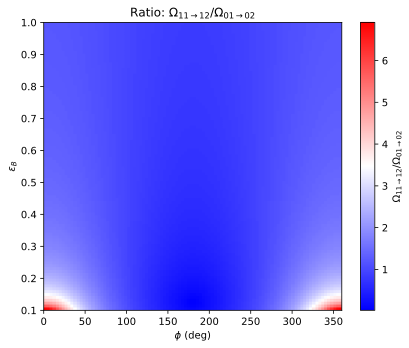

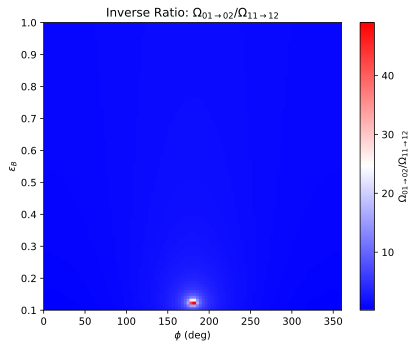

In [83]:
# Delta _ 2


import numpy as np
import matplotlib.pyplot as plt

def calc_Omega(nA, nB, eps_A, eps_B, phi_deg):
    phi = np.deg2rad(phi_deg)
    Omega = np.abs(eps_A * nA + eps_B * np.exp(1j * phi) * nB)
    return Omega

# New matrix elements
nA_01_02 = 0.0042 + 0.0000j
nB_01_02 = -1.847 - 0.001j
nA_11_12 = -0.0010 - 0.0073j
nB_11_12 = -0.255 - 1.829j

# Sweep parameters
eps_A = 30.0
eps_B_list = np.linspace(.10, 1, 100)
phi_list = np.linspace(0, 360, 100)

Omega_01_02_grid = np.zeros((len(eps_B_list), len(phi_list)))
Omega_11_12_grid = np.zeros((len(eps_B_list), len(phi_list)))
Omega_ratio_grid = np.zeros((len(eps_B_list), len(phi_list)))

for i, eps_B in enumerate(eps_B_list):
    for j, phi in enumerate(phi_list):
        Omega_01_02 = calc_Omega(nA_01_02, nB_01_02, eps_A, eps_B, phi)
        Omega_11_12 = calc_Omega(nA_11_12, nB_11_12, eps_A, eps_B, phi)
        Omega_01_02_grid[i, j] = Omega_01_02
        Omega_11_12_grid[i, j] = Omega_11_12
        Omega_ratio_grid[i, j] = Omega_11_12 / (Omega_01_02 + 1e-12)  # avoid division by zero

# Plot the ratio Omega_11_12 / Omega_01_02
plt.figure(figsize=(6, 5))
plt.imshow(Omega_ratio_grid, aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='bwr')
plt.colorbar(label=r'$\Omega_{11\rightarrow12} / \Omega_{01\rightarrow02}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'Ratio: $\Omega_{11\rightarrow12} / \Omega_{01\rightarrow02}$')
plt.tight_layout()
plt.show()

# ...existing code...
# Plot the inverse ratio Omega_01_02 / Omega_11_12
plt.figure(figsize=(6, 5))
plt.imshow(1 / (Omega_ratio_grid + 1e-12), aspect='auto', origin='lower',
           extent=[phi_list[0], phi_list[-1], eps_B_list[0], eps_B_list[-1]],
           cmap='bwr')
plt.colorbar(label=r'$\Omega_{01\rightarrow02} / \Omega_{11\rightarrow12}$')
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\epsilon_B$')
plt.title(r'Inverse Ratio: $\Omega_{01\rightarrow02} / \Omega_{11\rightarrow12}$')
plt.tight_layout()
plt.show()
# ...existing code...

In [ ]:
import numpy as np


sigma = 12 #ns
t_pi_ns = 48*2.3  # ns
t_pi = t_pi_ns * 1e-9  # seconds

Omega = np.pi / t_pi  # rad/s
f_rabi_Hz = Omega / (2 * np.pi)  # Hz
f_rabi_MHz = f_rabi_Hz / 1e6     # MHz

print(f"Rabi rate: {f_rabi_MHz:.2f} MHz")

Rabi rate: 4.53 MHz


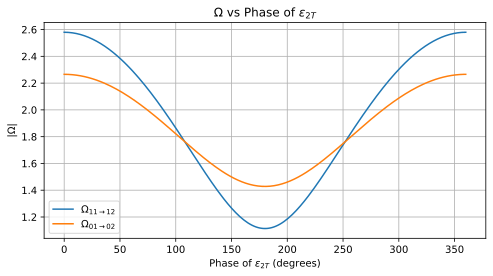

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Set amplitudes
amp_1F = 100  # fixed amplitude for eps_1F
amp_2T = 1  # amplitude for eps_2T

phase_1F = 0  # fixed phase in degrees
phase_2T_list = np.linspace(0, 360, 200)  # sweep phase from 0 to 360 degrees

omega_11_12_vals = []
omega_01_02_vals = []
phases = []

for phase_2T in phase_2T_list:
    eps_1F = amp_1F * np.exp(1j * np.deg2rad(phase_1F))
    eps_2T = amp_2T * np.exp(1j * np.deg2rad(phase_2T))
    Omega_11_12 = compute_Omega((1, 1), (1, 2), eps_1F=eps_1F, eps_2T=eps_2T)
    Omega_01_02 = compute_Omega((0, 1), (0, 2), eps_1F=eps_1F, eps_2T=eps_2T)
    omega_11_12_vals.append(np.abs(Omega_11_12))
    omega_01_02_vals.append(np.abs(Omega_01_02))
    phases.append(phase_2T)

plt.figure(figsize=(7, 4))
plt.plot(phases, omega_11_12_vals, label=r'$\Omega_{11\rightarrow12}$')
plt.plot(phases, omega_01_02_vals, label=r'$\Omega_{01\rightarrow02}$')
plt.xlabel('Phase of $\epsilon_{2T}$ (degrees)')
plt.ylabel(r'$|\Omega|$')
plt.title(r'$\Omega$ vs Phase of $\epsilon_{2T}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

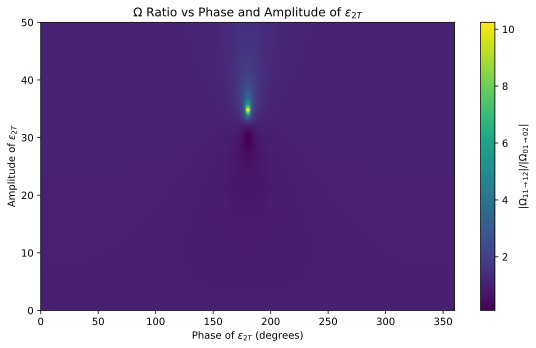

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sweep parameters
amp_1F = 1  # fixed
amp_2T_list = np.linspace(0, 0, 100)  # sweep amplitude
phase_2T_list = np.linspace(0, 360, 200)  # sweep phase in degrees

# Prepare arrays
Omega_11_12_grid = np.zeros((len(amp_2T_list), len(phase_2T_list)))
Omega_01_02_grid = np.zeros((len(amp_2T_list), len(phase_2T_list)))
ratio_grid = np.zeros((len(amp_2T_list), len(phase_2T_list)))

for i, amp_2T in enumerate(amp_2T_list):
    for j, phase_2T in enumerate(phase_2T_list):
        eps_1F = amp_1F * np.exp(1j * np.deg2rad(0))
        eps_2T = amp_2T * np.exp(1j * np.deg2rad(phase_2T))
        Omega_11_12 = compute_Omega((1, 1), (2, 1), eps_1F=eps_1F, eps_2T=eps_2T)
        Omega_01_02 = compute_Omega((1, 0), (2, 0), eps_1F=eps_1F, eps_2T=eps_2T)
        Omega_11_12_grid[i, j] = np.abs(Omega_11_12)
        Omega_01_02_grid[i, j] = np.abs(Omega_01_02)
        # Avoid division by zero
        ratio_grid[i, j] = np.abs(Omega_11_12) / (np.abs(Omega_01_02) + 1e-12)

# Plot ratio (or difference) as a 2D color map
plt.figure(figsize=(8, 5))
extent = [phase_2T_list[0], phase_2T_list[-1], amp_2T_list[0], amp_2T_list[-1]]
plt.imshow(ratio_grid, aspect='auto', origin='lower', extent=extent, cmap='viridis')
plt.colorbar(label=r'$|\Omega_{11\rightarrow12}| / |\Omega_{01\rightarrow02}|$')
plt.xlabel('Phase of $\epsilon_{2T}$ (degrees)')
plt.ylabel('Amplitude of $\epsilon_{2T}$')
plt.title(r'$\Omega$ Ratio vs Phase and Amplitude of $\epsilon_{2T}$')
plt.tight_layout()
plt.show()

### Checking Matrix elements for Fluxnoum 1-2

n_a_10_20 = 0.5348-0.2016j
n_b_10_20 = -0.015+0.006j
n_a_11_21 = -0.0000+0.5715j
n_b_11_21 = 0.000-0.019j


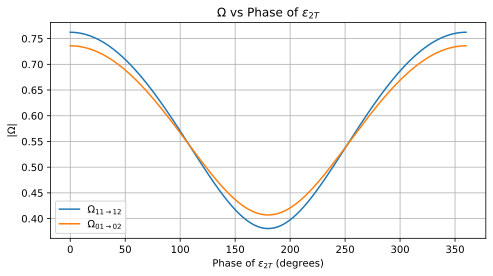

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Set amplitudes
amp_1F = 1  # fixed amplitude for eps_1F
amp_2T = 10  # amplitude for eps_2T

phase_1F = 0  # fixed phase in degrees
phase_2T_list = np.linspace(0, 360, 200)  # sweep phase from 0 to 360 degrees

omega_11_12_vals = []
omega_01_02_vals = []
phases = []

for phase_2T in phase_2T_list:
    eps_1F = amp_1F * np.exp(1j * np.deg2rad(phase_1F))
    eps_2T = amp_2T * np.exp(1j * np.deg2rad(phase_2T))
    Omega_11_12 = compute_Omega((1, 1), (2, 1), eps_1F=eps_1F, eps_2T=eps_2T)
    Omega_01_02 = compute_Omega((1, 0), (2, 0), eps_1F=eps_1F, eps_2T=eps_2T)
    omega_11_12_vals.append(np.abs(Omega_11_12))
    omega_01_02_vals.append(np.abs(Omega_01_02))
    phases.append(phase_2T)

plt.figure(figsize=(7, 4))
plt.plot(phases, omega_11_12_vals, label=r'$\Omega_{11\rightarrow12}$')
plt.plot(phases, omega_01_02_vals, label=r'$\Omega_{01\rightarrow02}$')
plt.xlabel('Phase of $\epsilon_{2T}$ (degrees)')
plt.ylabel(r'$|\Omega|$')
plt.title(r'$\Omega$ vs Phase of $\epsilon_{2T}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

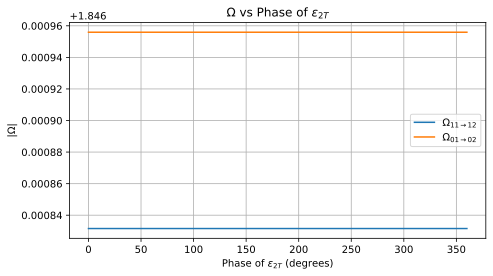

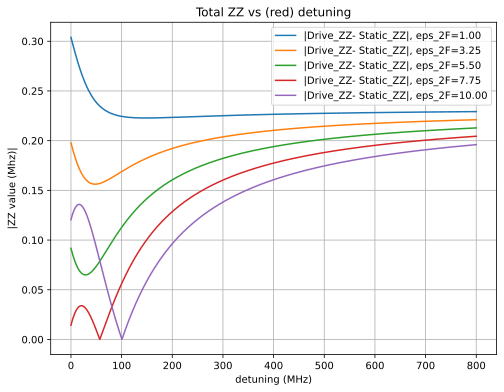

In [ ]:
# Function to get idsx value from (i, j) tuple

# work on this to calculate and map ZZ
def get_idx(state_tuple):
    state_string = f'{state_tuple[0]}{state_tuple[1]}'
    for idx, state_str in index_to_state.items():
        if state_str == state_string:
            return idx
    return None  # Return None if state_tuple is not found




eps_1F = .1
eps_2F_values = np.linspace(1, 10, 5)  # Varying eps_2F from 2 to 4
eps_1T = 1
eps_2T = 0.1  # Keeping eps_2T constant

del_values = np.linspace(0, 800, 2000)
Delta = Delta_2

plt.figure(figsize=(8, 6))

for eps_2F in eps_2F_values:
    # Calculate Omega values for each eps_2F
    Omega_1112 = abs(n_a[get_idx((1,1)), get_idx((1,2))]) * (eps_1F + eps_2F) + abs(n_b[get_idx((1,1)), get_idx((1,2))]) * (eps_1T + eps_2T)
    Omega_0102 = abs(n_a[get_idx((0,1)), get_idx((0,2))]) * (eps_1F + eps_2F) + abs(n_b[get_idx((0,1)), get_idx((0,2))]) * (eps_1T + eps_2T)
    
    # Calculate Drive_ZZ using the updated Omega values
    Drive_ZZ = -stark_effect(30 * Omega_1112, del_values) + stark_effect(30 * Omega_0102, del_values - (Delta))
    
    plt.plot(del_values, abs(Drive_ZZ + abs(Static_ZZ)), label=f'|Drive_ZZ- Static_ZZ|, eps_2F={eps_2F:.2f}', linewidth=1.5)

plt.title('Total ZZ vs (red) detuning')
plt.xlabel('detuning (MHz)')
plt.ylabel('|ZZ value (Mhz)|')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:



# Example usage
eps_F = 0.1
eps_T = 0.1
Delta = Delta_2
delta = 0.05
Omega_1112 = compute_Omega((1, 1), (1, 2), eps_1F=eps_F, eps_2T=eps_T)
Omega_0102 = compute_Omega((0, 1), (0, 2), eps_1F=eps_F, eps_2T=eps_T)
Drive_ZZ = -stark_effect(Omega_1112, delta) + stark_effect(Omega_0102, delta - (Delta))

In [62]:
print("Delta:", Delta)
print("Delta_2:", Delta_2)
print("Omega_0102:", Omega_0102)
print("Omega_1112:", Omega_1112)
print("Drive_ZZ:", Drive_ZZ)


Delta: 0.24158271786678398
Delta_2: 0.24158271786678398
Omega_0102: 0.1851142719817048
Omega_1112: 0.1854161767882458
Drive_ZZ: 0.11780224785991855
